# Laws Textures test

In [21]:
from feature_maps import laws_textures
import cv2, matplotlib.pyplot as plt, os, numpy as np

LABELS_DIR = "dtd/labels"
IMGS_DIR = "dtd/images"

def load_labels():
    out = {}
    with open(os.path.join(LABELS_DIR,"labels_joint_anno.txt"), "r") as f:
        line = f.readline()[:-1]
        while line:
            line         = line.split(" ")
            name, labels = line[0], line[1:]
            out[name]    = labels
            line         = f.readline()[:-1]
    return out

def load_set(labels, set_name = "train", N = 1000000):
    out = {}
    i = 0
    for s in [r for r in os.listdir(LABELS_DIR) if r.startswith("train")]:
        with open(os.path.join(LABELS_DIR,s), "r") as f:
            line = f.readline()[:-1]
            while line:
                img = cv2.imread(os.path.join(IMGS_DIR,line), cv2.IMREAD_GRAYSCALE)
                out[line] = {}
                out[line]["image"] = img
                out[line]["label"] = labels[line]
                line = f.readline()[:-1]
        i += 1
        if i >= N:
            break
    return out

## Load datasets

In [25]:
labes = load_labels()
trainset = load_set(labes, "train", N = 1)
len(trainset)

1880

## Plot textures

In [3]:
laws = laws_textures(vector_dims = 5)

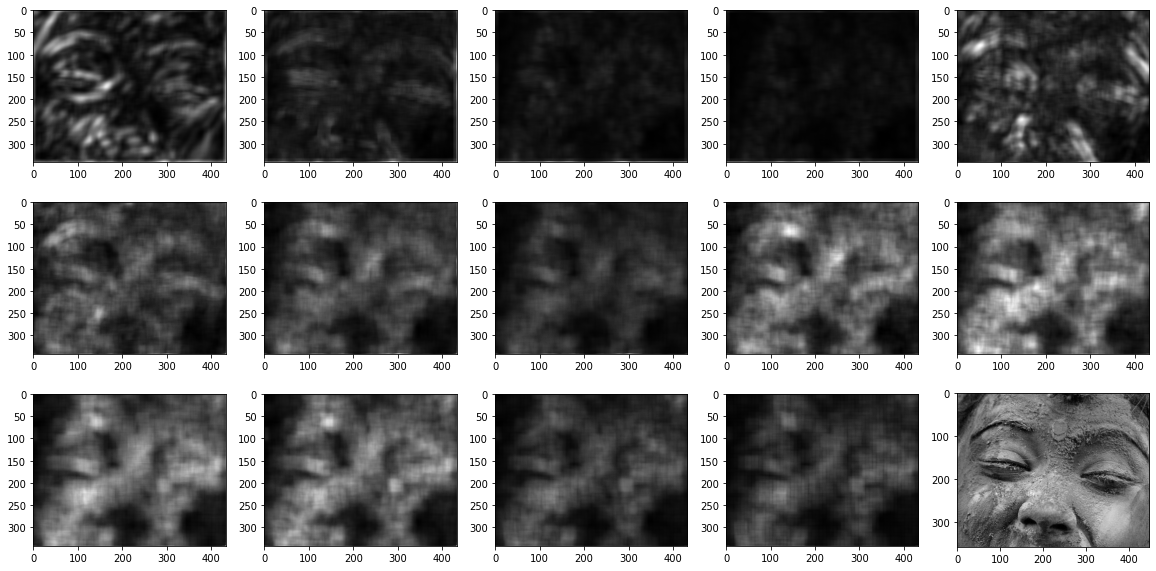

(343, 433, 14)

In [16]:
# np.random.seed(0)
random_img = np.random.choice(list(trainset.keys()))

img = trainset[random_img]["image"]
maps = laws.get_features(img, preprocess = True, merge_symmetric = True, compute_energy = True)

rows = 5
cols = 3
fig, axs = plt.subplots(cols, rows, figsize=(20, 10))

for i in range(cols):
    for j in range(rows):
        index = i*rows+j
        if index == 14:
            axs[i,j].imshow(img, cmap = "gray")
        else:
            axs[i,j].imshow(maps[...,index], cmap = "gray")
plt.show()
maps.shape

## Generate features

In [39]:
%%time
import tqdm

keys = list(trainset.keys())
for i in tqdm.tqdm(range(100)):
    img_name = keys[i]
    trainset[img_name]["laws"] = laws.get_features(trainset[img_name]["image"])

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]

CPU times: user 1min 3s, sys: 5.19 s, total: 1min 9s
Wall time: 1min 11s


In [40]:
for img in trainset:
    if "laws" in trainset[img]:
        print(trainset[])

{'banded/banded_0002.jpg': {'image': array([[127, 128, 125, ..., 148, 149, 150],
         [127, 128, 125, ..., 148, 149, 150],
         [127, 128, 125, ..., 148, 149, 150],
         ...,
         [127, 128, 125, ..., 148, 149, 150],
         [127, 128, 125, ..., 148, 149, 150],
         [127, 128, 125, ..., 148, 149, 150]], dtype=uint8),
  'label': ['banded', ''],
  'laws': array([[[2.31791058e+05, 4.32110267e+04, 3.89415644e+04, ...,
           2.12840000e+02, 3.77493333e+02, 7.70733333e+02],
          [2.05142133e+05, 3.88062933e+04, 3.18325778e+04, ...,
           1.17413333e+02, 1.62631111e+02, 2.76026667e+02],
          [1.90159058e+05, 3.21247378e+04, 2.61151733e+04, ...,
           4.11022222e+01, 5.27822222e+01, 1.20853333e+02],
          ...,
          [1.53271444e+05, 3.18058844e+04, 2.68660133e+04, ...,
           4.97155556e+01, 6.30888889e+01, 1.50480000e+02],
          [1.59186400e+05, 3.97559156e+04, 3.37342311e+04, ...,
           1.40760000e+02, 1.10648889e+02, 3.07853